In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
cases_ds = pd.read_csv(cases_url).drop(columns=["Lat", "Long"])
time_series = pd.melt(cases_ds, id_vars=['Country/Region', 'Province/State'], var_name='Date', value_name='Cum. Cases')
time_series['Province/State'] = time_series['Province/State'].fillna('N/A')
time_series['Date'] = pd.to_datetime(time_series['Date'])
time_series.sort_values(by=['Country/Region', 'Province/State', 'Date'], inplace=True)
time_series['Cases'] = time_series.groupby(['Country/Region', 'Province/State'])['Cum. Cases'].diff().fillna(0)

deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths_ds = pd.read_csv(deaths_url).drop(columns=["Lat", "Long"])
deaths_ts = pd.melt(deaths_ds, id_vars=['Country/Region', 'Province/State'], var_name='Date', value_name='Cum. Deaths')
deaths_ts['Province/State'] = deaths_ts['Province/State'].fillna('N/A')
deaths_ts['Date'] = pd.to_datetime(deaths_ts['Date'])
deaths_ts.sort_values(by=['Country/Region', 'Province/State', 'Date'], inplace=True)
deaths_ts['Deaths'] = deaths_ts.groupby(['Country/Region', 'Province/State'])['Cum. Deaths'].diff().fillna(0)

combined = pd.merge(time_series, deaths_ts, on=['Country/Region', 'Province/State', 'Date'])
combined

,Country/Region,Province/State,Date,Cum. Cases,Cases,Cum. Deaths,Deaths
0,Afghanistan,N/A,2020-01-22,0,0.0,0,0.0
1,Afghanistan,N/A,2020-01-23,0,0.0,0,0.0
2,Afghanistan,N/A,2020-01-24,0,0.0,0,0.0
3,Afghanistan,N/A,2020-01-25,0,0.0,0,0.0
4,Afghanistan,N/A,2020-01-26,0,0.0,0,0.0
5,Afghanistan,N/A,2020-01-27,0,0.0,0,0.0
6,Afghanistan,N/A,2020-01-28,0,0.0,0,0.0
7,Afghanistan,N/A,2020-01-29,0,0.0,0,0.0
8,Afghanistan,N/A,2020-01-30,0,0.0,0,0.0
9,Afghanistan,N/A,2020-01-31,0,0.0,0,0.0


In [2]:
country = combined.loc[(combined['Country/Region'] == 'Italy') & (combined['Province/State'] == 'N/A')].reset_index(drop=True)
country

,Country/Region,Province/State,Date,Cum. Cases,Cases,Cum. Deaths,Deaths
0,Italy,N/A,2020-01-22,0,0.0,0,0.0
1,Italy,N/A,2020-01-23,0,0.0,0,0.0
2,Italy,N/A,2020-01-24,0,0.0,0,0.0
3,Italy,N/A,2020-01-25,0,0.0,0,0.0
4,Italy,N/A,2020-01-26,0,0.0,0,0.0
5,Italy,N/A,2020-01-27,0,0.0,0,0.0
6,Italy,N/A,2020-01-28,0,0.0,0,0.0
7,Italy,N/A,2020-01-29,0,0.0,0,0.0
8,Italy,N/A,2020-01-30,0,0.0,0,0.0
9,Italy,N/A,2020-01-31,2,2.0,0,0.0


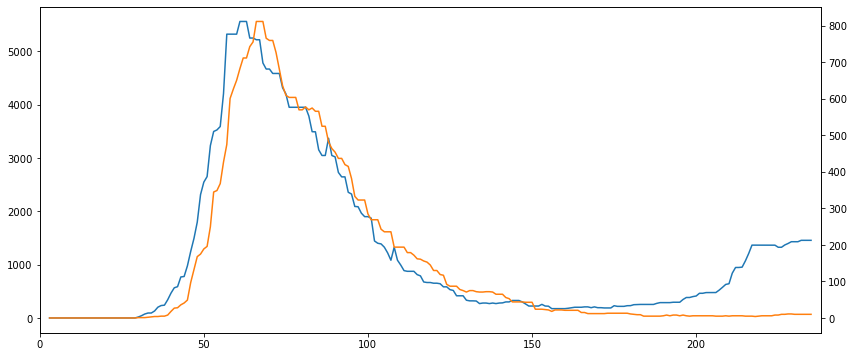

In [3]:
f,ax=plt.subplots(figsize=(14,6))
#country['Cases'].rolling(window=14,center=True).median().plot(ax=ax)
country['Cases'].rolling(window=7,center=True).median().plot(ax=ax)
#country['Deaths'].rolling(window=14,center=True).median().plot(ax=ax, secondary_y=True)
country['Deaths'].rolling(window=7,center=True).median().plot(ax=ax, secondary_y=True)
#country['Cases'].plot(ax=ax)

Text(0.5, 0.98, 'Covid data and rolling window correlation')

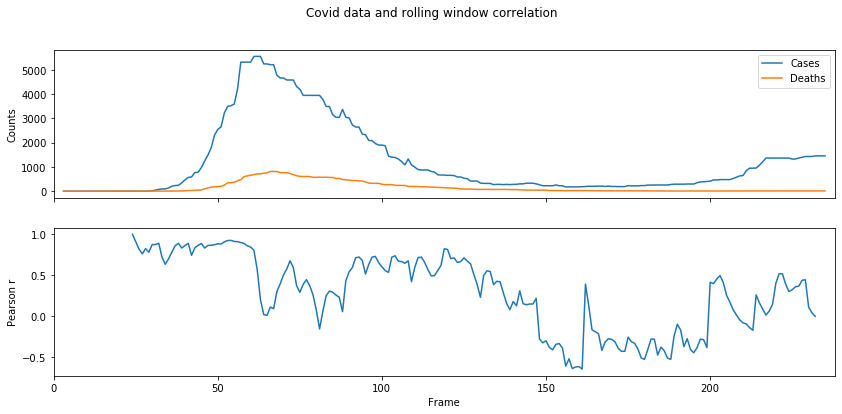

In [4]:
r, p = stats.pearsonr(country['Cases'], country['Deaths'])
# Set window size to compute moving window synchrony.
r_window_size = 14
# Interpolate missing data.
df_interpolated = country[['Cases', 'Deaths']].interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['Cases'].rolling(window=r_window_size, center=True).corr(df_interpolated['Deaths'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
country[['Cases', 'Deaths']].rolling(window=7,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Counts')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Covid data and rolling window correlation")

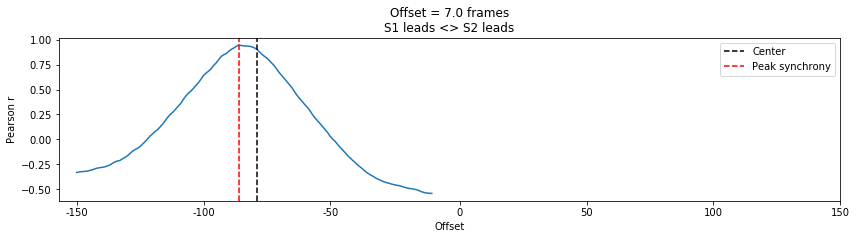

In [5]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = country['Cases']
d2 = country['Deaths']
seconds = 5
fps = 14
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


[Text(69.0, 0.5, 'Window epochs'),
 (140, 175),
 Text(0.5, 24.0, 'Offset'),
 Text(0.5, 1, 'Windowed Time Lagged Cross Correlation')]

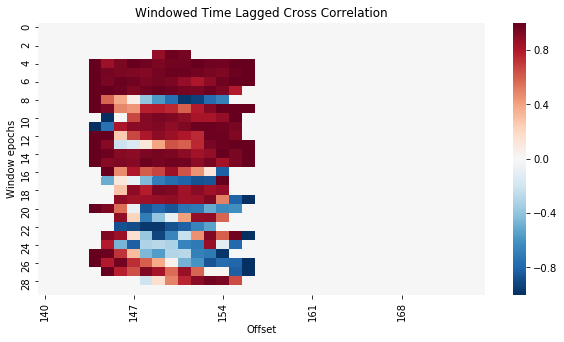

In [6]:
# Windowed time lagged cross correlation
seconds = 5
fps = 30
no_splits = 30
samples_per_split = country.shape[0]/no_splits
rss=[]
df = country[['Cases', 'Deaths']].reset_index().rolling(window=10,center=True).median()
for t in range(0, no_splits):
    d1 = df['Cases'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = df['Deaths'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss.fillna(0),cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation', xlim=[140,175], xlabel='Offset',ylabel='Window epochs')
#ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
#ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

[Text(69.0, 0.5, 'Epochs'),
 (133, 189),
 Text(0.5, 69.0, 'Offset'),
 Text(0.5, 1, 'Rolling Windowed Time Lagged Cross Correlation')]

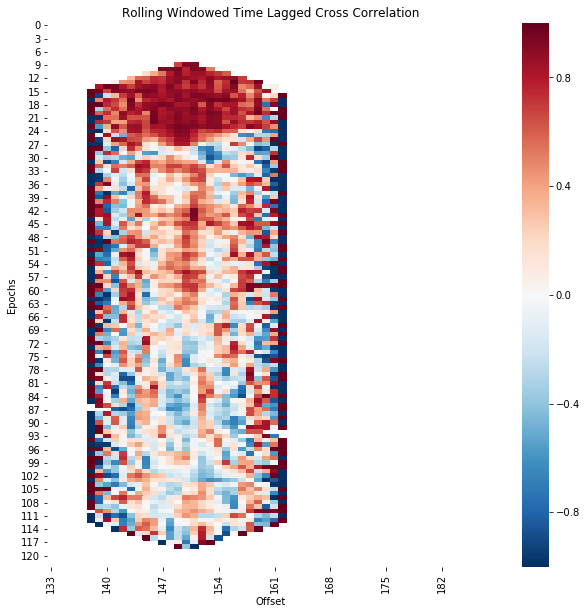

In [7]:
seconds = 5
fps = 30
window_size = 14 #samples
t_start = 0
t_end = t_start + window_size
step_size = 2
rss=[]
df = country[['Cases', 'Deaths']]
while t_end < 260:
    d1 = df['Cases'].iloc[t_start:t_end]
    d2 = df['Deaths'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[133,189], xlabel='Offset',ylabel='Epochs')
#ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
#ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);